In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
# ===========================================
# 2. Load Dataset
# ===========================================
df=pd.read_csv(r"C:\Users\jdpri\OneDrive\Documents\Human_Voice_Proj\Data\human_voice_no_duplicates.csv")
df.head()

,mean_spectral_centroid,std_spectral_centroid,mean_spectral_bandwidth,std_spectral_bandwidth,mean_spectral_contrast,mean_spectral_flatness,mean_spectral_rolloff,zero_crossing_rate,rms_energy,mean_pitch,...,mfcc_9_std,mfcc_10_mean,mfcc_10_std,mfcc_11_mean,mfcc_11_std,mfcc_12_mean,mfcc_12_std,mfcc_13_mean,mfcc_13_std,label
0,2247.331739,1158.537748,1870.415462,370.405241,21.440710,0.036879,4419.438073,0.169241,0.082552,1592.1033,...,21.736240,2.303085,8.983318,-17.410305,9.115154,0.301804,10.452693,-3.080832,10.146248,0
1,1790.719889,996.554825,1757.898617,410.710318,21.513383,0.018936,3635.742188,0.108068,0.055477,1112.6351,...,13.937135,-0.953942,10.831742,-0.088775,10.297690,-7.281142,10.926579,-0.450248,8.489134,0
2,1977.923363,1010.148667,1747.099555,461.458379,20.476283,0.032616,3873.291016,0.144633,0.060388,1557.5225,...,14.900779,0.260098,14.031009,-0.420670,10.810292,-0.199829,11.986182,3.372986,9.285437,0
3,2037.765550,1311.440630,1745.224852,419.056484,19.516014,0.028482,3826.584507,0.148933,0.029559,1481.0868,...,15.957924,-1.486122,14.461978,-8.479608,12.550333,3.997028,9.912608,-6.946966,10.574301,0
4,1739.383829,1092.623322,1623.135563,450.088465,20.260620,0.025737,3452.903892,0.117961,0.069078,1424.5352,...,15.105562,-3.366364,13.943447,-6.561539,11.944948,1.410639,13.110976,-3.252258,9.866687,0


In [38]:
numeric_cols = df.select_dtypes(include=['float64','int64']).columns

outlier_summary = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    # Count outliers
    outliers = ((df[col] < lower) | (df[col] > upper)).sum()
    outlier_summary[col] = outliers

# Convert to dataframe for better view
outlier_df = pd.DataFrame(list(outlier_summary.items()), columns=['Column','Outlier_Count'])
outlier_df = outlier_df.sort_values(by="Outlier_Count", ascending=False)

print(outlier_df.head(20))

                     Column  Outlier_Count
11                max_pitch           1586
4    mean_spectral_contrast            951
10                min_pitch            781
12                std_pitch            625
14        spectral_kurtosis            561
31              mfcc_8_mean            473
32               mfcc_8_std            447
21              mfcc_3_mean            387
17              mfcc_1_mean            281
24               mfcc_4_std            277
13            spectral_skew            268
3    std_spectral_bandwidth            250
23              mfcc_4_mean            209
5    mean_spectral_flatness            208
42              mfcc_13_std            181
28               mfcc_6_std            173
34               mfcc_9_std            171
15           energy_entropy            159
20               mfcc_2_std            155
2   mean_spectral_bandwidth            147


In [39]:
top_outlier=df[['max_pitch','mean_spectral_contrast','min_pitch','std_pitch','spectral_kurtosis','mfcc_8_mean','mfcc_8_std','mfcc_3_mean','mfcc_1_mean','mfcc_4_std','spectral_skew','std_spectral_bandwidth','mfcc_4_mean','mean_spectral_flatness','mfcc_13_std','mfcc_6_std','mfcc_9_std','energy_entropy','mfcc_2_std','mean_spectral_bandwidth']]
for col in top_outlier:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
    df[col]=np.where(df[col]<lower,lower,np.where(df[col]>upper,upper,df[col]))

Outlier dectection after capping it

In [40]:
numeric_cols = df.select_dtypes(include=['float64','int64']).columns

outlier_summary = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    # Count outliers
    outliers = ((df[col] < lower) | (df[col] > upper)).sum()
    outlier_summary[col] = outliers

# Convert to dataframe for better view
outlier_df = pd.DataFrame(list(outlier_summary.items()), columns=['Column','Outlier_Count'])
outlier_df = outlier_df.sort_values(by="Outlier_Count", ascending=False)

print(outlier_df.head(20))

                    Column  Outlier_Count
38             mfcc_11_std            144
16              log_energy            141
40             mfcc_12_std            131
9               mean_pitch            129
26              mfcc_5_std            111
36             mfcc_10_std             87
35            mfcc_10_mean             86
7       zero_crossing_rate             62
6    mean_spectral_rolloff             60
0   mean_spectral_centroid             58
27             mfcc_6_mean             57
19             mfcc_2_mean             55
39            mfcc_12_mean             53
8               rms_energy             53
25             mfcc_5_mean             51
18              mfcc_1_std             47
30              mfcc_7_std             46
22              mfcc_3_std             34
41            mfcc_13_mean             33
29             mfcc_7_mean             27


In [41]:
FEATURE_COLS = [
    'mean_spectral_centroid','std_spectral_centroid',
    'mean_spectral_bandwidth','std_spectral_bandwidth',
    'mean_spectral_contrast','mean_spectral_flatness','mean_spectral_rolloff',
    'zero_crossing_rate','rms_energy',
    'mean_pitch','min_pitch','max_pitch','std_pitch',
    'spectral_skew','spectral_kurtosis',
    'energy_entropy','log_energy',
    'mfcc_1_mean','mfcc_1_std','mfcc_2_mean','mfcc_2_std',
    'mfcc_3_mean','mfcc_3_std','mfcc_4_mean','mfcc_4_std',
    'mfcc_5_mean','mfcc_5_std','mfcc_6_mean','mfcc_6_std',
    'mfcc_7_mean','mfcc_7_std','mfcc_8_mean','mfcc_8_std',
    'mfcc_9_mean','mfcc_9_std','mfcc_10_mean','mfcc_10_std',
    'mfcc_11_mean','mfcc_11_std','mfcc_12_mean','mfcc_12_std',
    'mfcc_13_mean','mfcc_13_std'
]
features = df[FEATURE_COLS].values 
labels = df['label'].values

In [ ]:
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(features)
#X_scaled

array([[ 1.71741547,  0.49112114,  0.        , ...,  0.40431442,
         0.83770606,  0.        ],
       [ 0.28102803, -0.07538615,  0.        , ...,  0.66469707,
         1.48399449,  0.        ],
       [ 0.86992366, -0.02784404,  0.        , ...,  1.24690932,
         2.42329617,  0.        ],
       ...,
       [ 0.37381848,  0.62745756,  0.        , ..., -0.32331257,
         0.73869227,  0.        ],
       [-0.20373301,  0.13192571,  0.        , ..., -0.54424215,
        -0.2228134 ,  0.        ],
       [-0.30419462,  0.01920216,  0.        , ..., -0.62966821,
         0.43367122,  0.        ]], shape=(15070, 43))

K-Mean and DBScan clustering

In [45]:
kmeans=KMeans(n_clusters=2, random_state=42)
df['kmeans_cluster']=kmeans.fit_predict(features)
df['kmeans_cluster']

0        0
1        0
2        0
3        0
4        0
        ..
15065    0
15066    0
15067    0
15068    0
15069    0
Name: kmeans_cluster, Length: 15070, dtype: int32

In [46]:
f= (df['kmeans_cluster'] == 1).sum()
print(f"values: {f}:")

values: 6921:


In [47]:
dbscan=DBSCAN(eps=2,min_samples=5)
df['dbscan_cluster']=dbscan.fit_predict(features)
df['dbscan_cluster']


0       -1
1       -1
2       -1
3       -1
4       -1
        ..
15065   -1
15066   -1
15067   -1
15068   -1
15069   -1
Name: dbscan_cluster, Length: 15070, dtype: int64

In [48]:
p = (df['dbscan_cluster'] == -1).sum()
print(f"Number of outliers: {p}")

Number of outliers: 15070


Visualize K-Means clusters using first two PCA components

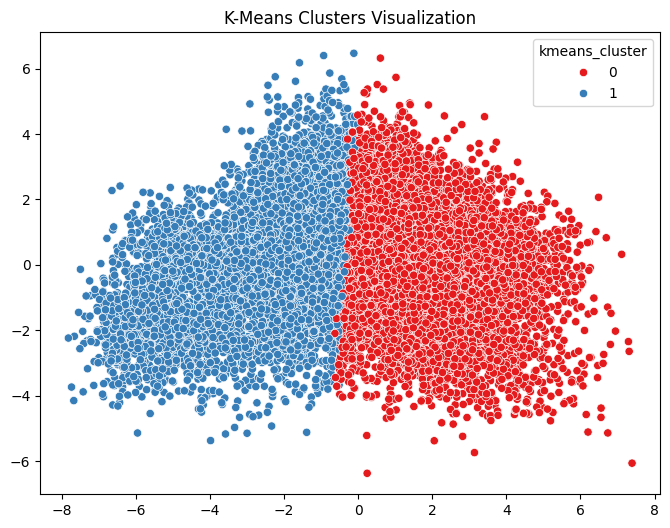

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
components = pca.fit_transform(features)
plt.figure(figsize=(8,6))
sns.scatterplot(x=components[:,0], y=components[:,1], hue=df['kmeans_cluster'], palette='Set1')
plt.title("K-Means Clusters Visualization")
plt.show()

In [42]:
# ===========================================
#  Train-Test Split
# ===========================================
X_train,X_test,y_train,y_test=train_test_split(features,labels,test_size=0.2,random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# ===========================================
#  Classification Models
# ===========================================

# ----- Random Forest -----
rf=RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(X_train_scaled,y_train)
y_pred_rf = rf.predict(X_test_scaled)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9930325149303252
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1079
           1       0.99      1.00      0.99      1935

    accuracy                           0.99      3014
   macro avg       0.99      0.99      0.99      3014
weighted avg       0.99      0.99      0.99      3014



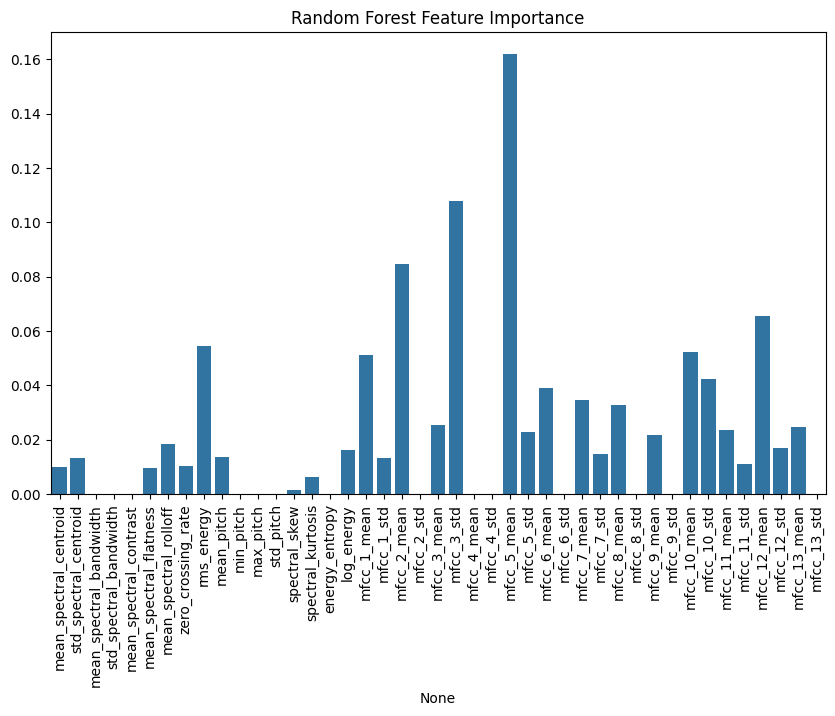

In [14]:
# Feature importance plot
importances = rf.feature_importances_
plt.figure(figsize=(10,6))
sns.barplot(x=features.columns, y=importances)
plt.xticks(rotation=90)
plt.title("Random Forest Feature Importance")
plt.show()

In [15]:
# ----- Support Vector Machine -----
svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.9973457199734572
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1079
           1       1.00      1.00      1.00      1935

    accuracy                           1.00      3014
   macro avg       1.00      1.00      1.00      3014
weighted avg       1.00      1.00      1.00      3014



In [16]:
# ----- Neural Network -----
mlp=MLPClassifier(hidden_layer_sizes=(32,16),max_iter=500,random_state=42)
mlp.fit(X_train,y_train)
y_pred_mlp=mlp.predict(X_test)
print("Neural Network Accuracy:", accuracy_score(y_test, y_pred_mlp))
print(classification_report(y_test, y_pred_mlp))

Neural Network Accuracy: 0.9970139349701393
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1079
           1       1.00      1.00      1.00      1935

    accuracy                           1.00      3014
   macro avg       1.00      1.00      1.00      3014
weighted avg       1.00      1.00      1.00      3014



In [17]:
##---Hyperparameter Tuning (All Models)---#
###SVM Model ###
from sklearn.model_selection import GridSearchCV
param_grid_svm = {'C':[0.1,1,10], 'kernel':['linear','rbf','poly'], 'gamma':['scale','auto']}
svm = SVC(class_weight='balanced') 
grid_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy')
grid_svm.fit(X_train, y_train)
print("Best Parameters:", grid_svm.best_params_)
best_svm = grid_svm.best_estimator_

Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [18]:
## MLP(Neural network)##
param_grid_mlp = {'hidden_layer_sizes': [(64,32), (128,64)], 'activation':['relu','tanh'], 'alpha':[0.0001,0.001]}
grid_mlp = GridSearchCV(MLPClassifier(max_iter=500, random_state=42), param_grid_mlp, cv=5, scoring='accuracy')
grid_mlp.fit(X_train, y_train)
best_mlp = grid_mlp.best_estimator_

In [43]:
# Hyperparameter Tuning (Random Forest Example)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
rf = RandomForestClassifier(random_state=42, class_weight="balanced")
grid = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_scaled, y_train)
best_rf = grid.best_estimator_

print("Best parameters:", grid.best_params_)
print("Train Accuracy:", best_rf.score(X_train_scaled, y_train))
print("Test Accuracy:", best_rf.score(X_test_scaled, y_test))

y_pred = best_rf.predict(X_test_scaled)
print(classification_report(y_test, y_pred, target_names=["Female (0)", "Male (1)"]))

Best parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}
Train Accuracy: 1.0
Test Accuracy: 0.9943596549435966
              precision    recall  f1-score   support

  Female (0)       1.00      0.99      0.99      1079
    Male (1)       0.99      1.00      1.00      1935

    accuracy                           0.99      3014
   macro avg       1.00      0.99      0.99      3014
weighted avg       0.99      0.99      0.99      3014



Model Evaluation and Comparison after hyperparameter tuning

In [20]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1-score": f1_score(y_test, y_pred, average='weighted'),
        "Confusion Matrix": confusion_matrix(y_test, y_pred)
    }

results = {}

results["Random Forest"] = evaluate_model(best_rf, X_test, y_test)
results["SVM"] = evaluate_model(best_svm, X_test, y_test)
results["Neural Network"] = evaluate_model(best_mlp,X_test, y_test)

summary_table = pd.DataFrame(results).T
print(summary_table)

                Accuracy Precision    Recall  F1-score  \
Random Forest   0.991374  0.991406  0.991374  0.991359   
SVM             0.997678  0.997677  0.997678  0.997677   
Neural Network  0.997014  0.997014  0.997014  0.997014   

                       Confusion Matrix  
Random Forest   [[1058, 21], [5, 1930]]  
SVM              [[1075, 4], [3, 1932]]  
Neural Network   [[1074, 5], [4, 1931]]  


Cluster silhouette score measurements

In [24]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
import numpy as np

# Step 1: Tune KMeans on training data
k_values = range(2, 10)
best_kmeans_score = -1
best_kmeans_model = None

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels_train = kmeans.fit_predict(X_train)
    score = silhouette_score(X_train, labels_train)
    if score > best_kmeans_score:
        best_kmeans_score = score
        best_kmeans_model = kmeans

print(f"Best KMeans Clusters: {best_kmeans_model.n_clusters}, Silhouette Score (train): {best_kmeans_score:.4f}")

# Step 2: Tune DBSCAN on training data
best_eps, best_score = None, -1
for eps in [0.3, 0.5, 0.7, 1.0, 1.5]:
    db = DBSCAN(eps=eps, min_samples=5)
    labels = db.fit_predict(X_train)
    if len(set(labels)) > 1 and len(set(labels)) != 1:
        try:
            score = silhouette_score(X_train, labels)
            if score > best_score:
                best_score, best_eps = score, eps
        except:
            continue

best_dbscan = DBSCAN(eps=best_eps, min_samples=5)

if best_dbscan:
    print(f"Best DBSCAN Params: eps={best_eps}, min_samples={best_dbscan.min_samples}, Silhouette Score (train): {best_score:.4f}")
else:
    print("DBSCAN did not find valid clusters.")

# Step 3: Select best model overall
if best_kmeans_score >= best_score:
    final_model = best_kmeans_model
    model_name = "KMeans"
else:
    final_model = best_dbscan
    model_name = "DBSCAN"

# Step 4: Evaluate on Test Data
labels_test = final_model.fit_predict(X_test)

if len(set(labels_test)) > 1:
    silhouette = silhouette_score(X_test, labels_test)
    db_score = davies_bouldin_score(X_test, labels_test)
else:
    silhouette = None
    db_score = None

print(f"\nBest Model: {model_name}")
print(f"Silhouette Score (test): {silhouette}")
print(f"Davies-Bouldin Score (test): {db_score}")


Best KMeans Clusters: 2, Silhouette Score (train): 0.1601
Best DBSCAN Params: eps=1.5, min_samples=5, Silhouette Score (train): -0.0008

Best Model: KMeans
Silhouette Score (test): 0.15849752798046043
Davies-Bouldin Score (test): 2.1207943991618046


Using PCA on KMean to get good silhouette score

In [24]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# Step 1: Apply PCA (keep 95% variance or fixed n_components)
pca = PCA(n_components=0.95, random_state=42)  
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print(f"Original features: {X_train.shape[1]}, After PCA: {X_train_pca.shape[1]}")

# Step 2: Find best number of clusters using train data
best_score = -1
best_k = None
best_model = None

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels_train = kmeans.fit_predict(X_train_pca)
    score = silhouette_score(X_train_pca, labels_train)
    
    if score > best_score:
        best_score = score
        best_k = k
        best_model = kmeans

print(f"Best KMeans Clusters (Train): {best_k}, Silhouette Score: {best_score:.4f}")

# Step 3: Evaluate best model on Test data
labels_test = best_model.predict(X_test_pca)
sil_test = silhouette_score(X_test_pca, labels_test)
db_test = davies_bouldin_score(X_test_pca, labels_test)

print(f"Silhouette Score (Test): {sil_test:.4f}")
print(f"Davies-Bouldin Score (Test): {db_test:.4f}")

# Step 4: Evaluate with ARI & NMI (needs ground truth labels y_train, y_test)
if 'y_train' in locals() and 'y_test' in locals():
    ari_test = adjusted_rand_score(y_test, labels_test)
    nmi_test = normalized_mutual_info_score(y_test, labels_test)

    print(f"Adjusted Rand Index (Test): {ari_test:.4f}")
    print(f"Normalized Mutual Info (Test): {nmi_test:.4f}")
else:
    print("⚠️ Ground truth labels not found, skipping ARI & NMI evaluation.")

Original features: 43, After PCA: 22
Best KMeans Clusters (Train): 2, Silhouette Score: 0.1668
Silhouette Score (Test): 0.1656
Davies-Bouldin Score (Test): 2.0637
Adjusted Rand Index (Test): 0.0170
Normalized Mutual Info (Test): 0.0325


Save model

In [44]:
from sklearn.pipeline import Pipeline
import pickle
#svm_pipeline = Pipeline([
rf_pipeline = Pipeline([
    ('scaler', scaler),       # your fitted scaler
   #('svm', best_svm)         # your trained svm model
    ('RandomForest',best_rf) # your trained Random Forest model
])

with open("rf_pipeline.pkl",'wb')as f:
    pickle.dump(rf_pipeline,f)

#with open("best_kmeans_model.pkl",'wb')as f:
 #   pickle.dump(best_kmeans_model,f)